# DataDex Project

## 1. Project Description

The aim of this project is to predict the outcome of a one-versus-one Pokémon battle based on the Pokémons' statistics (Attack, Defense etc), their type (Poison, Normal etc) and win-loss data from previous battles.

No Pokémon were harmed during this analysis.

In [19]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
combat_df = pd.read_csv('Dataset/combats.csv')

combat_df.head()

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


In [26]:
pokemon_df = pd.read_csv('Dataset/pokemon.csv')

# Renaming "#" to "Number"
pokemon_df = pokemon_df.rename(index=str, columns={"#": "Number"})

pokemon_df.head()

,Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


## 2. Understanding the dataset
### For the Pokemon file
**Number:** Refers to the Pokémon's number in the [List of Pokémon by National Pokédex number](https://bulbapedia.bulbagarden.net/wiki/List_of_Pokémon_by_National_Pokédex_number).

**Type 1:** All Pokémon have a main type. Type 1 refers to the main type.

**Type 2:** Some Pokémon have a secondary type. Type 2 refers to the secondary type.

**HP, Attack, Defense, Sp. Atk, Sp. Def, Speed:** Refers to the Pokémon's stats.

**Generation:** Refers to the season of the show during which the Pokémon was released.

**Legendary:** Special attribute that only very few Pokémon have.

### For the Combat file
**First_pokemon:** The Number of the Pokémon who went first.

**Second_pokemon:** The Number of the Pokémon who went second.

**Winner:** The Number of the Pokémon who won.

## 3. Cleaning up the dataset
Let's make sure our dataset does not have any missing values.

In [ ]:
# Empty values in the Pokémon DF
pokemon_df.isnull().sum()

Empty values in Type 2 is normal, since some Pokémon don't have a secondary type. From the analysis, we can deduce that there are 386 Pokémon without a secondary type.

We have one missing Pokémon name. Let's find it using this [link](https://bulbapedia.bulbagarden.net/wiki/List_of_Pokémon_by_National_Pokédex_number).

In [ ]:
print("This pokemon is before the missing Pokemon: " + pokemon_df['Name'][61])
print(pokemon_df[pokemon_df['Name'].isnull()])
print("This pokemon is after the missing Pokemon: " + pokemon_df['Name'][63])

So the missing Pokémon's number is 63. Using the link, we can see that the name of the missing Pokémon is Primeape. Let's add it.

In [27]:
# pokemon_df['Name'][62] = "Primeape" <- returns SettingWithCopyWarning

pokemon_df.loc[pokemon_df.Number == 63, 'Name'] = "Primeape"

# Display the new data
primeape = pokemon_df[pokemon_df["Number"] == 63]
primeape

,Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
62,63,Primeape,Fighting,NaN,65,105,60,60,70,95,1,False


In [28]:
pokemon_df.isnull().sum()

Number          0
Name            0
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

As we can see, the empty value has been replaced.

Now, let's see the range of values in our dataset.

In [29]:
pokemon_df.describe()

,Number,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


## Data Visualization

In order to choose the right visualisation method, first we have to see the different types of variables that our datasets contain.

In [30]:
print(pokemon_df.dtypes)

Number         int64
Name          object
Type 1        object
Type 2        object
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object


In [31]:
print(combat_df.dtypes)

First_pokemon     int64
Second_pokemon    int64
Winner            int64
dtype: object


Let's see how a Pokémon's type(s) correlates with its wins.

In [32]:
pokemon_df.corr()

/var/folders/b5/_hj6qjj118j8lqjrs5zr2l0m0000gn/T/ipykernel_3308/3962370133.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pokemon_df.corr()


,Number,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Number,1.000000,0.097712,0.102664,0.094691,0.089199,0.085596,0.012181,0.983428,0.154336
HP,0.097712,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683,0.273620
Attack,0.102664,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451,0.345408
Defense,0.094691,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419,0.246377
Sp. Atk,0.089199,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437,0.448907
Sp. Def,0.085596,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486,0.363937
Speed,0.012181,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121,0.326715
Generation,0.983428,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000,0.079794
Legendary,0.154336,0.273620,0.345408,0.246377,0.448907,0.363937,0.326715,0.079794,1.000000


/var/folders/b5/_hj6qjj118j8lqjrs5zr2l0m0000gn/T/ipykernel_3308/1337307710.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(pokemon_df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)


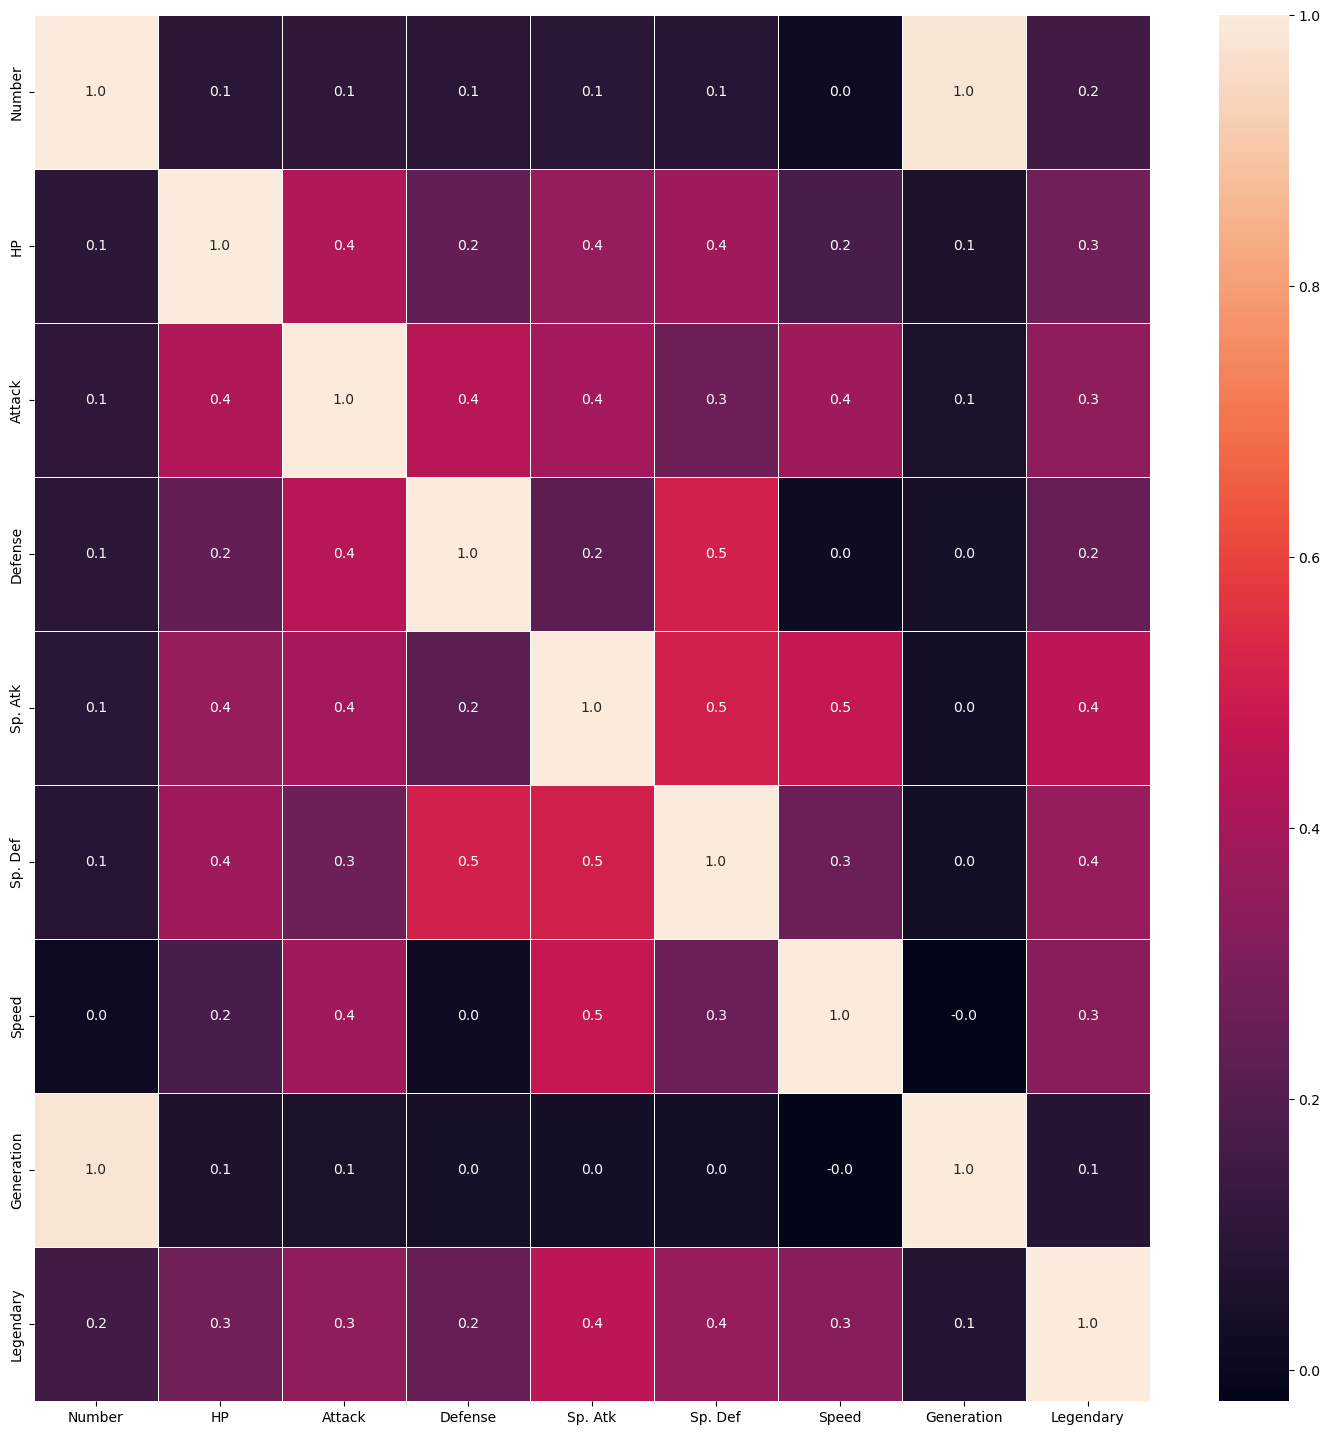

In [33]:
# Correlation Map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(pokemon_df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

## 3. Data Preparation & Pre-processing
### 3.1. Data Cleaning

As we can see from the correlation map earlier, the "Generation" column has next-to-no correlation with the other columns. Therefore, it would not be incorrect to assume that it will not have any effect on our predictions. Due to this, we will drop the "Generation" column from our dataframe.

In [34]:
pokemon_df.drop(['Generation'], axis = 1)

,Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False
...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,True
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,True
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,True
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,True


In [35]:
# Empty values in the Pokémon DF
pokemon_df.isnull().sum()

Number          0
Name            0
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [36]:
print("This pokemon is before the missing Pokemon: " + pokemon_df['Name'][61])
print(pokemon_df[pokemon_df['Name'].isnull()])
print("This pokemon is after the missing Pokemon: " + pokemon_df['Name'][63])

This pokemon is before the missing Pokemon: Mankey
Empty DataFrame
Columns: [Number, Name, Type 1, Type 2, HP, Attack, Defense, Sp. Atk, Sp. Def, Speed, Generation, Legendary]
Index: []
This pokemon is after the missing Pokemon: Growlithe


In [37]:
# pokemon_df['Name'][62] = "Primeape" <- returns SettingWithCopyWarning

pokemon_df.loc[pokemon_df.Number == 63, 'Name'] = "Primeape"

# Display the new data
primeape = pokemon_df[pokemon_df["Number"] == 63]
primeape

,Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
62,63,Primeape,Fighting,NaN,65,105,60,60,70,95,1,False


In [38]:
pokemon_df.isnull().sum()

Number          0
Name            0
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

### 3.2. Data Visualization

In order to choose the right visualisation method, first we have to see the different types of variables that our datasets contain.

In [39]:
print(pokemon_df.dtypes)

Number         int64
Name          object
Type 1        object
Type 2        object
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object


In [40]:
print(combat_df.dtypes)

First_pokemon     int64
Second_pokemon    int64
Winner            int64
dtype: object


Here, we are trying to see the most common types of Pokémon, while differentiating between the normal ones and the "Legendary" ones. Usually, "Legendary" Pokémon have better stats than their normal counterparts.

Text(0.5, 1.0, 'Total Pokémon by Type 1')

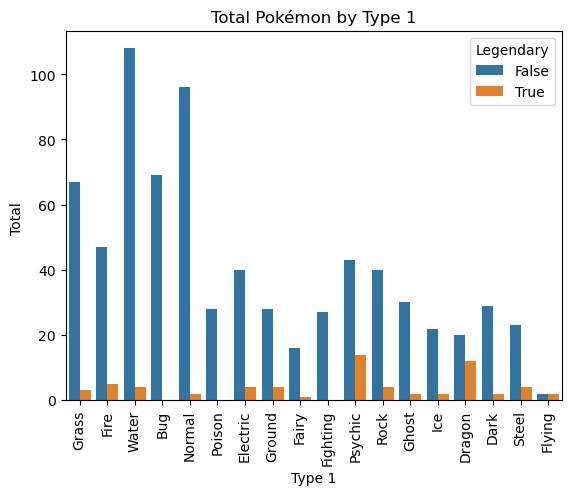

In [41]:
sns.set_color_codes("bright")
ax = sns.countplot(x="Type 1", hue="Legendary", data=pokemon_df)
plt.xticks(rotation= 90)
plt.xlabel('Type 1')
plt.ylabel('Total ')
plt.title("Total Pokémon by Type 1")

Text(0.5, 1.0, 'Total Pokémon by Type 2')

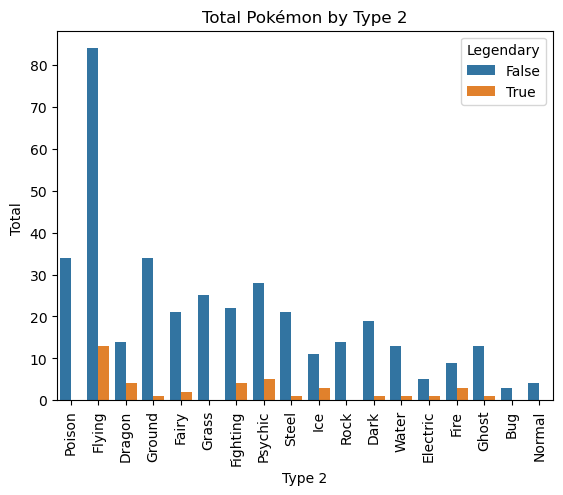

In [43]:
ax = sns.countplot(x="Type 2", hue="Legendary", data=pokemon_df)
plt.xticks(rotation= 90)
plt.xlabel('Type 2')
plt.ylabel('Total ')
plt.title("Total Pokémon by Type 2")

From these two graphs, we can see that:
- For "Type 1", the most common types are: Water, Normal & Grass.
- For "Type 2", the most common types are: Flying & Poison.

While this does not tell me about the stats of each type, this information is useful when taking into account "type weaknesses".

Type weaknesses are when certain types of Pokémon are weak to other types. For example, Water Pokémon are weak to Grass and Electric Pokémon. So, we can factor in type differences when trying to predict the outcome of a battle.

#### 3.2.1. Plots
##### Line Plots

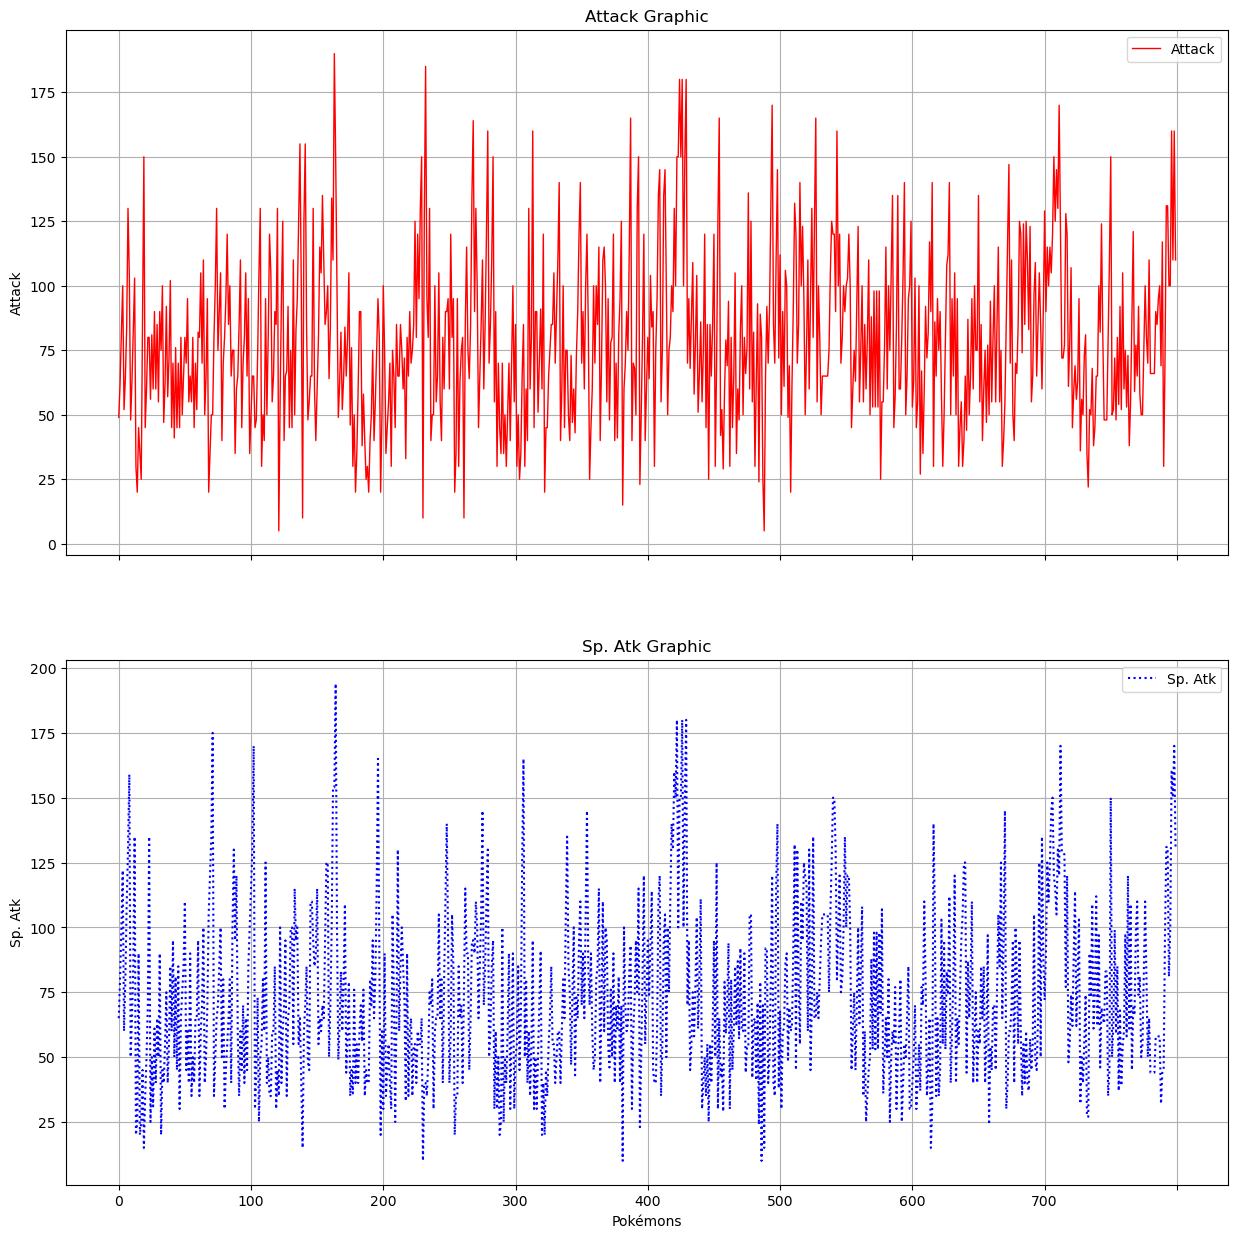

In [44]:
f,(ax1,ax2) = plt.subplots(2,1,figsize= (15,15),sharex=True)
pokemon_df.Attack.plot(kind="line",color="red",label="Attack",grid=True,linewidth=1,ax=ax1)
ax1.set_ylabel("Attack")
ax1.legend()
ax1.set_title("Attack Graphic")

pokemon_df["Sp. Atk"].plot(kind = "line",color="blue",label="Sp. Atk",grid=True,linestyle=":",ax=ax2)
ax2.set_title("Sp. Atk Graphic")
plt.xlabel("Pokémons")
plt.ylabel("Sp. Atk")
ax2.legend()
plt.show()

##### Bar Plots

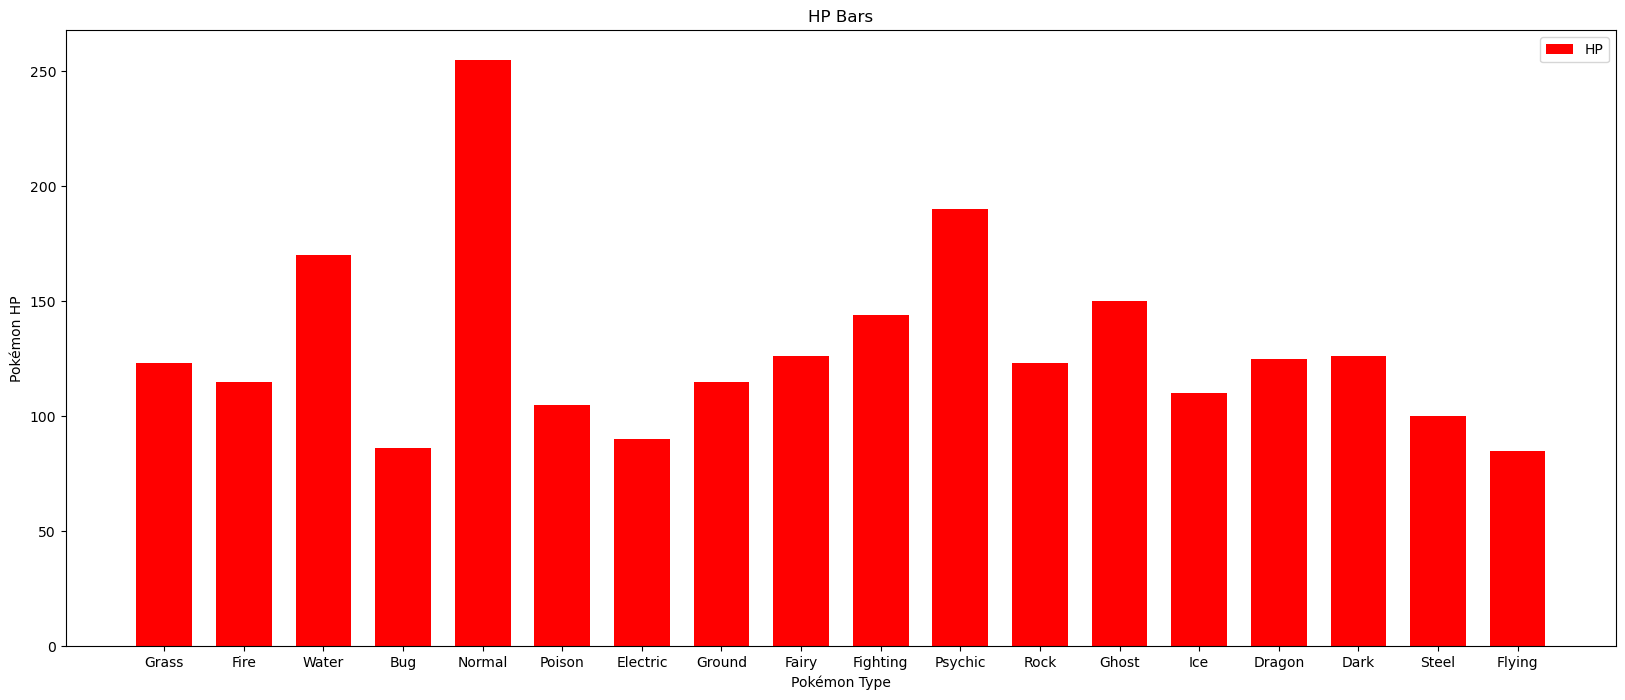

In [45]:
plt.figure(figsize = (20,8))

plt.bar(pokemon_df["Type 1"],pokemon_df.HP,label="HP",color="red",width = 0.7)
plt.xlabel("Pokémon Type")
plt.ylabel("Pokémon HP")
plt.title("HP Bars")
plt.legend()
plt.show()

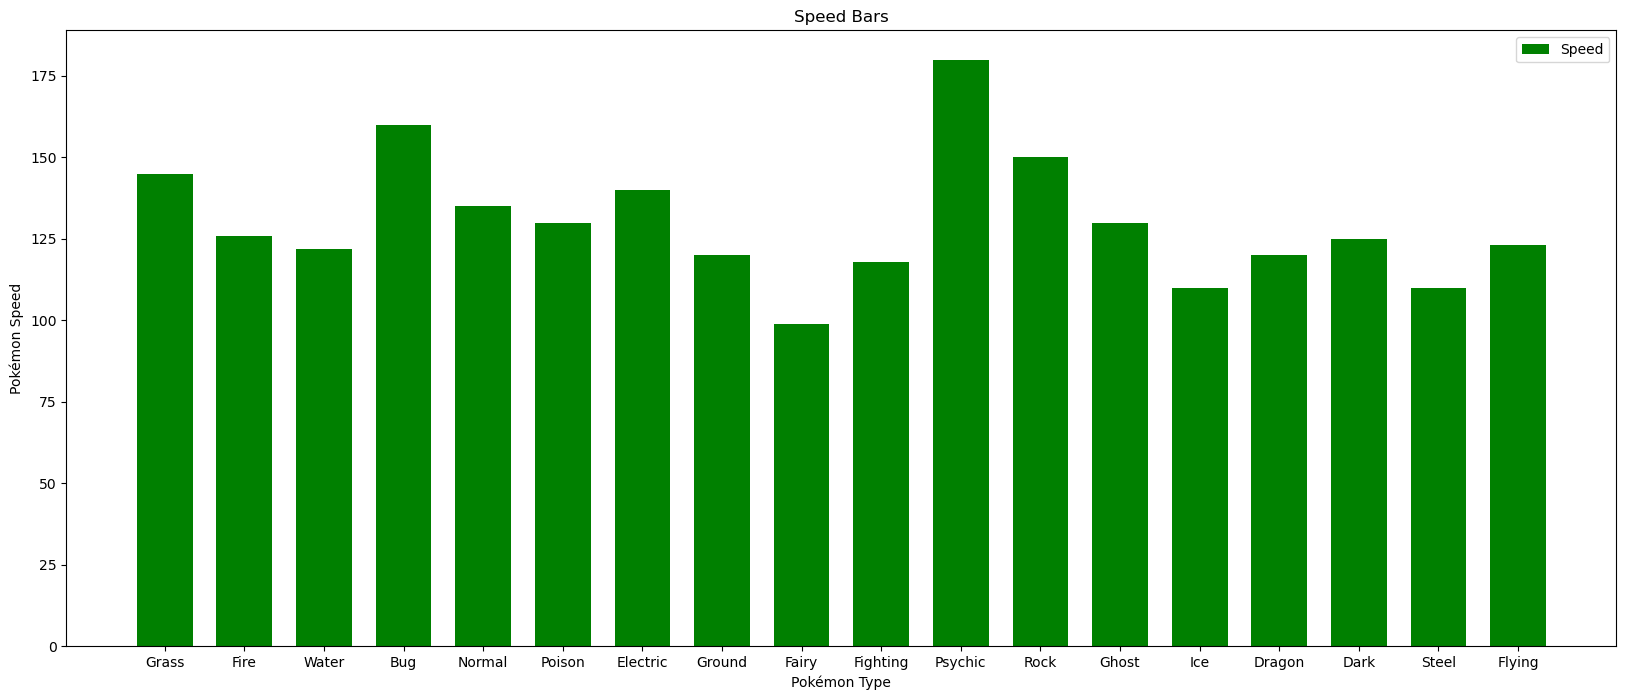

In [46]:
plt.figure(figsize = (20,8))

plt.bar(pokemon_df["Type 1"],pokemon_df.Speed,label="Speed",color="green",width=.7)
plt.xlabel("Pokémon Type")
plt.ylabel("Pokémon Speed")
plt.title("Speed Bars")
plt.legend()

While these graphs allow us to see the distribution of the stats across the different types, this still doesn't allow us to see the clear picture. We're still unable to determine what makes a Pokémon win a battle. This is where we move on to feature selection and feature engineering.

### 3.4. Feature Selection & Feature Engineering

Now we move on to calculating the win percentages of the Pokémon. This, combined with (something something stat correlation) will help us have a narrower view on the possibility of a certain Pokémon winning.

In [47]:
# Calculate win% of each Pokémon

# Add the calculations to the pokemon dataset 
total_Wins = combat_df.Winner.value_counts()

# Get # of wins for each Pokémon
numberOfWins = combat_df.groupby('Winner').count()

countByFirst = combat_df.groupby('Second_pokemon').count()
countBySecond = combat_df.groupby('First_pokemon').count()
print("Looking at the dimensions of our dataframes")
print("Count by first winner shape: " + str(countByFirst.shape))
print("Count by second winner shape: " + str(countBySecond.shape))
print("Total Wins shape : " + str(total_Wins.shape))

Looking at the dimensions of our dataframes
Count by first winner shape: (784, 2)
Count by second winner shape: (784, 2)
Total Wins shape : (783,)


We can see that the number of dimensions is different in the total wins. This means that there is one pokemon that didn't win a single fight. Let's find it.

In [48]:
find_losing_pokemon= np.setdiff1d(countByFirst.index.values, numberOfWins.index.values)-1 #offset because the index and number are off by one
losing_pokemon = pokemon_df.iloc[find_losing_pokemon[0],]
print(losing_pokemon)

Number            231
Name          Shuckle
Type 1            Bug
Type 2           Rock
HP                 20
Attack             10
Defense           230
Sp. Atk            10
Sp. Def           230
Speed               5
Generation          2
Legendary       False
Name: 230, dtype: object


In [49]:
numberOfWins = numberOfWins.sort_index()
numberOfWins['Total Fights'] = countByFirst.Winner + countBySecond.Winner
numberOfWins['Win Percentage']= numberOfWins.First_pokemon/numberOfWins['Total Fights']

# merge the winning dataset and the original pokemon dataset
results2 = pd.merge(pokemon_df, numberOfWins, right_index = True, left_on='Number')
results3 = pd.merge(pokemon_df, numberOfWins, left_on='Number', right_index = True, how='left')

#subset the dataframe where pokemon win percent is NaN
results3[results3['Win Percentage'].isnull()]

,Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,First_pokemon,Second_pokemon,Total Fights,Win Percentage
11,12,Blastoise,Water,NaN,79,83,100,85,105,78,1,False,NaN,NaN,NaN,NaN
32,33,Sandshrew,Ground,NaN,50,75,85,20,30,40,1,False,NaN,NaN,NaN,NaN
45,46,Wigglytuff,Normal,Fairy,140,70,45,85,50,45,1,False,NaN,NaN,NaN,NaN
65,66,Poliwag,Water,NaN,40,50,40,40,40,90,1,False,NaN,NaN,NaN,NaN
77,78,Victreebel,Grass,Poison,80,105,65,100,70,70,1,False,NaN,NaN,NaN,NaN
89,90,Magneton,Electric,Steel,50,60,95,120,70,70,1,False,NaN,NaN,NaN,NaN
143,144,Ditto,Normal,NaN,48,48,48,48,48,48,1,False,NaN,NaN,NaN,NaN
182,183,Ariados,Bug,Poison,70,90,70,60,60,40,2,False,NaN,NaN,NaN,NaN
230,231,Shuckle,Bug,Rock,20,10,230,10,230,5,2,False,NaN,NaN,NaN,NaN
235,236,Ursaring,Normal,NaN,90,130,75,75,75,55,2,False,NaN,NaN,NaN,NaN


The Pokémon with null values for their "Win Percentage" are Pokémon who have never won a battle.

Let's compare the top 15 Pokémon with the worst "Win Percentage" and the top 15 Pokémon with the best "Win Percentage".

In [50]:
# creating a df for Pokémon with worst win%

worst_pokemon = results3[np.isfinite(results3['Win Percentage'])].sort_values(by = ['Win Percentage']).head(15)
worst_pokemon

,Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,First_pokemon,Second_pokemon,Total Fights,Win Percentage
289,290,Silcoon,Bug,NaN,50,35,55,25,25,15,3,False,3.0,3.0,138.0,0.021739
189,190,Togepi,Fairy,NaN,35,20,65,40,65,20,2,False,3.0,3.0,122.0,0.024590
638,639,Solosis,Psychic,NaN,45,30,40,105,50,20,5,False,4.0,4.0,129.0,0.031008
236,237,Slugma,Fire,NaN,40,40,40,70,40,20,2,False,4.0,4.0,123.0,0.032520
576,577,Munna,Psychic,NaN,76,25,45,67,55,24,5,False,5.0,5.0,128.0,0.039062
188,189,Igglybuff,Normal,Fairy,90,30,15,40,20,15,2,False,5.0,5.0,115.0,0.043478
394,395,Wynaut,Psychic,NaN,95,23,48,23,48,23,3,False,6.0,6.0,130.0,0.046154
209,210,Wooper,Water,Ground,55,45,45,25,25,15,2,False,6.0,6.0,125.0,0.048000
291,292,Cascoon,Bug,NaN,50,35,55,25,25,15,3,False,7.0,7.0,133.0,0.052632
752,753,Spritzee,Fairy,NaN,78,52,60,63,65,23,6,False,8.0,8.0,133.0,0.060150


In [51]:
# Pokémon with best win%

best_pokemon = results3[np.isfinite(results3['Win Percentage'])].sort_values(by = ['Win Percentage'], ascending = False ).head(15)
best_pokemon

,Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,First_pokemon,Second_pokemon,Total Fights,Win Percentage
154,155,Mega Aerodactyl,Rock,Flying,80,135,85,70,95,150,1,False,127.0,127.0,129.0,0.984496
512,513,Weavile,Dark,Ice,70,120,65,45,85,125,4,False,116.0,116.0,119.0,0.974790
703,704,Tornadus Therian Forme,Flying,NaN,79,100,80,110,90,121,5,True,121.0,121.0,125.0,0.968000
19,20,Mega Beedrill,Bug,Poison,65,150,40,15,80,145,1,False,115.0,115.0,119.0,0.966387
153,154,Aerodactyl,Rock,Flying,80,105,65,60,75,130,1,False,136.0,136.0,141.0,0.964539
476,477,Mega Lopunny,Normal,Fighting,65,136,94,54,96,135,4,False,124.0,124.0,129.0,0.961240
726,727,Greninja,Water,Dark,72,95,67,103,71,122,6,False,122.0,122.0,127.0,0.960630
716,717,Meloetta Pirouette Forme,Normal,Fighting,100,128,90,77,77,128,5,False,118.0,118.0,123.0,0.959350
164,165,Mega Mewtwo Y,Psychic,NaN,106,150,70,194,120,140,1,True,119.0,119.0,125.0,0.952000
349,350,Mega Sharpedo,Water,Dark,70,140,70,110,65,105,3,False,114.0,114.0,120.0,0.950000


Now let's visualize the differences in stats between the best & worst Pokémon. Let's take a look at the differences between "HP" and "Attack".

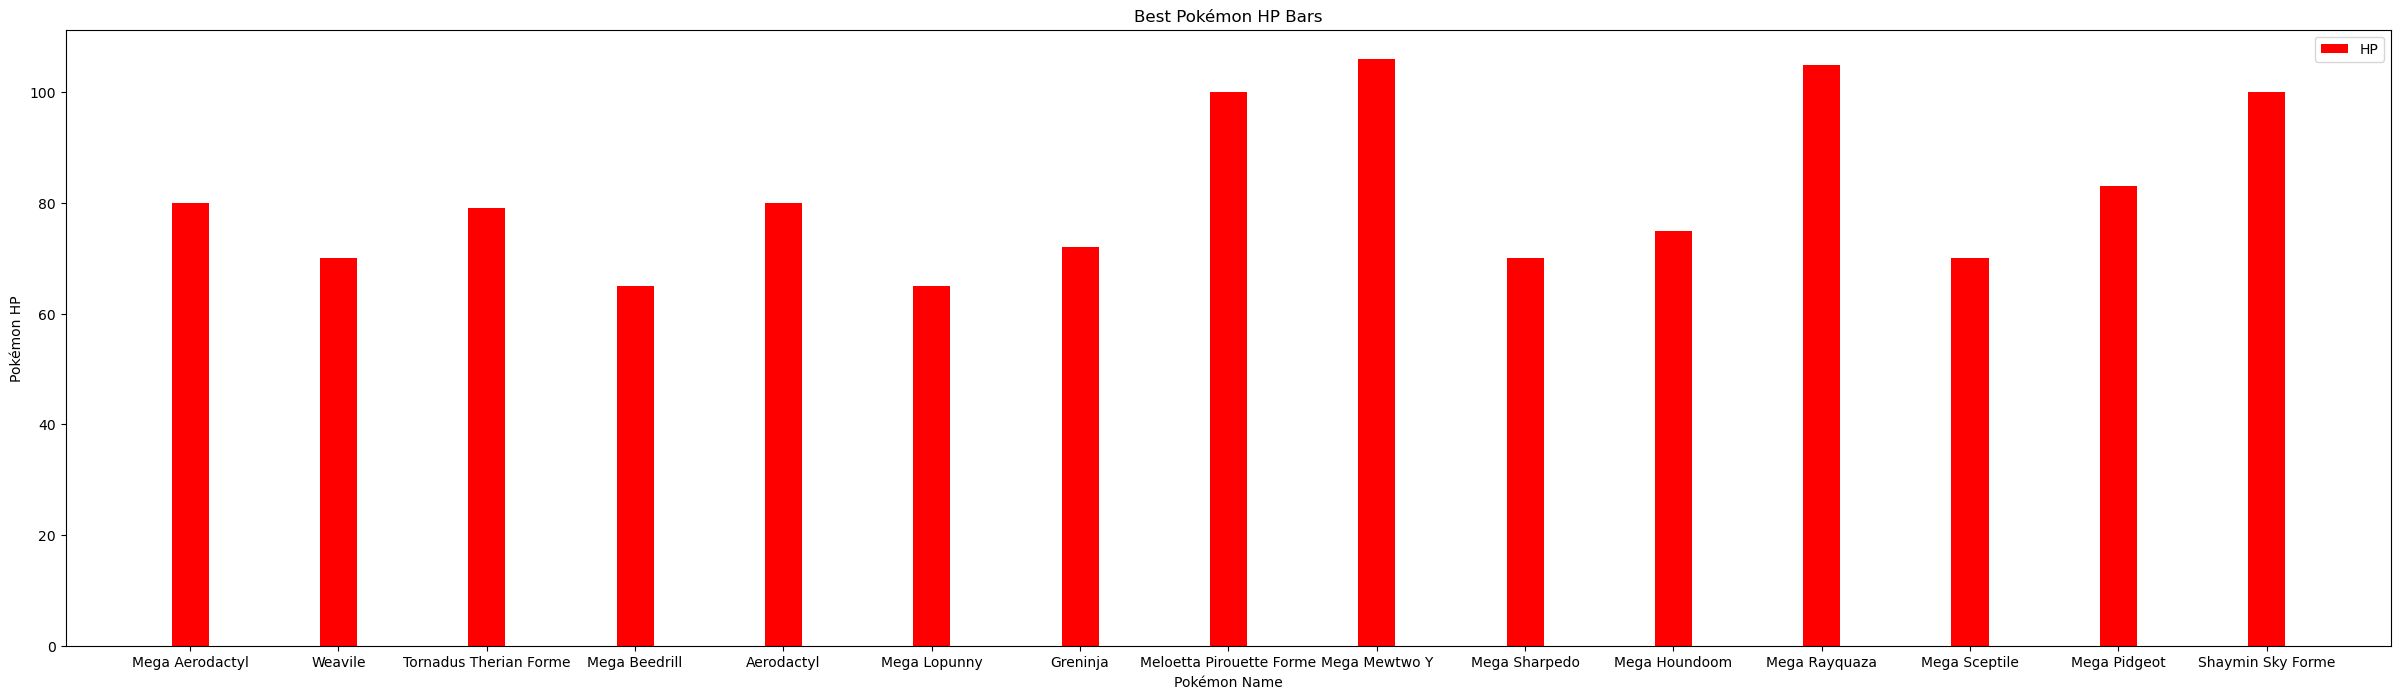

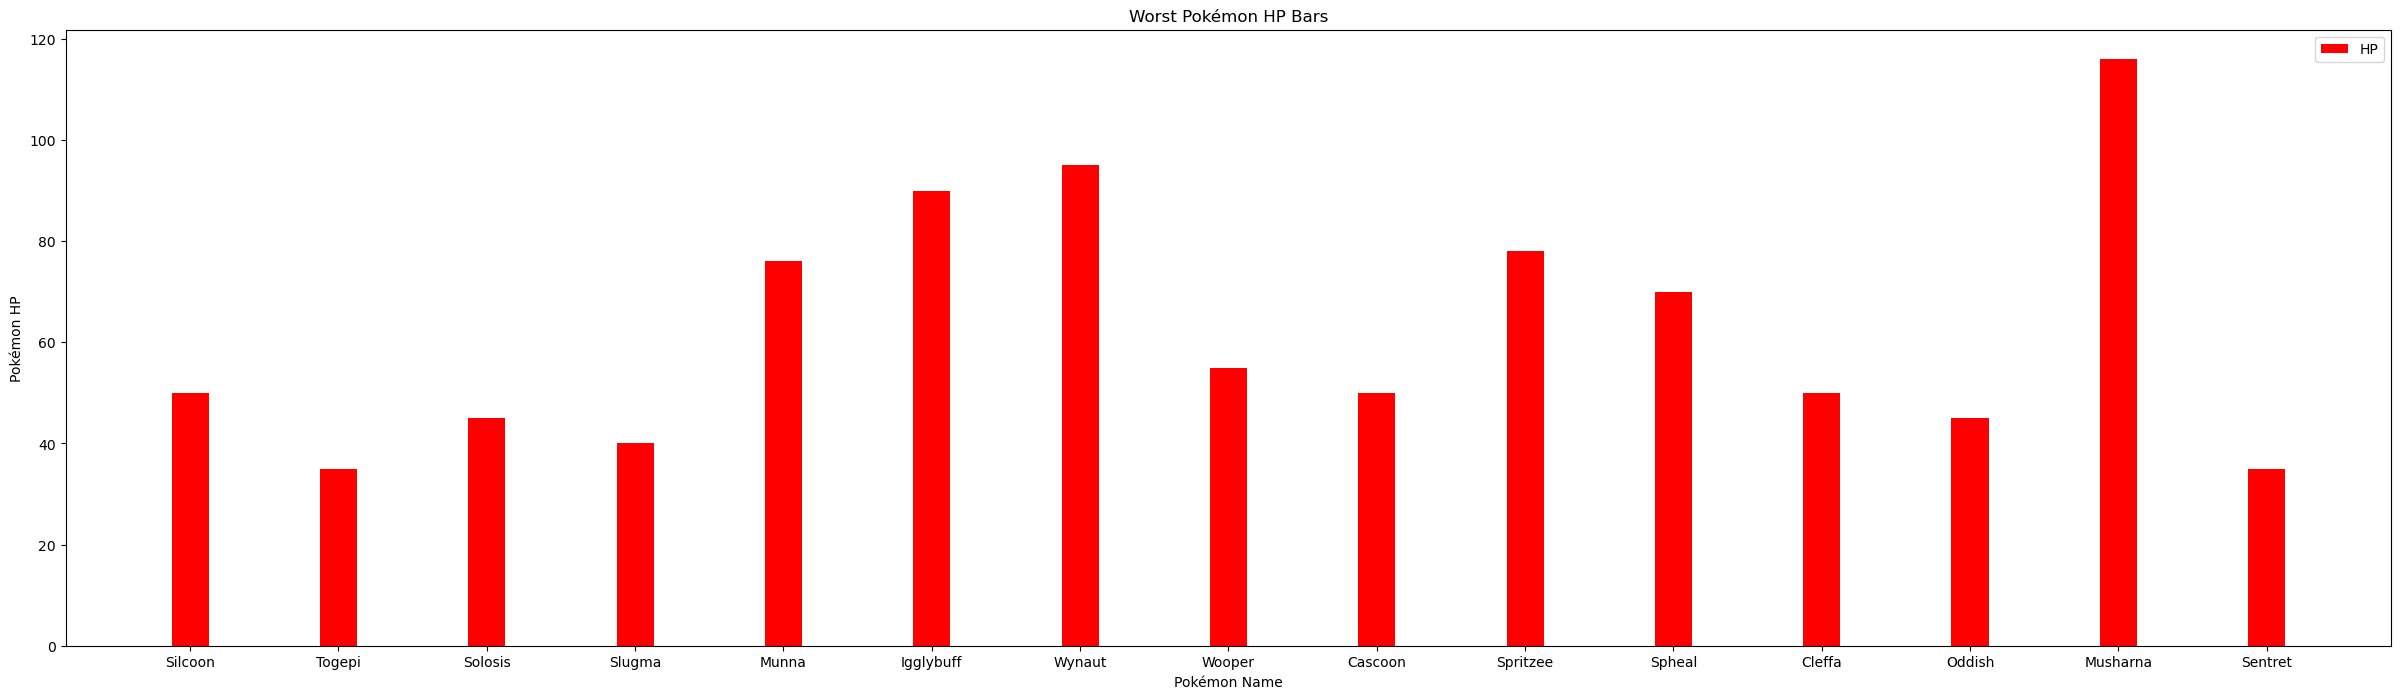

In [52]:
plt.figure(figsize = (30,8))

plt.bar(best_pokemon["Name"],best_pokemon.HP,label="HP",color="red",width = 0.25)
plt.xlabel("Pokémon Name")
plt.ylabel("Pokémon HP")
plt.title("Best Pokémon HP Bars")
plt.legend()
plt.show()

plt.figure(figsize = (30,8))

plt.bar(worst_pokemon["Name"],worst_pokemon.HP,label="HP",color="red",width = 0.25)
plt.xlabel("Pokémon Name")
plt.ylabel("Pokémon HP")
plt.title("Worst Pokémon HP Bars")
plt.legend()
plt.show()

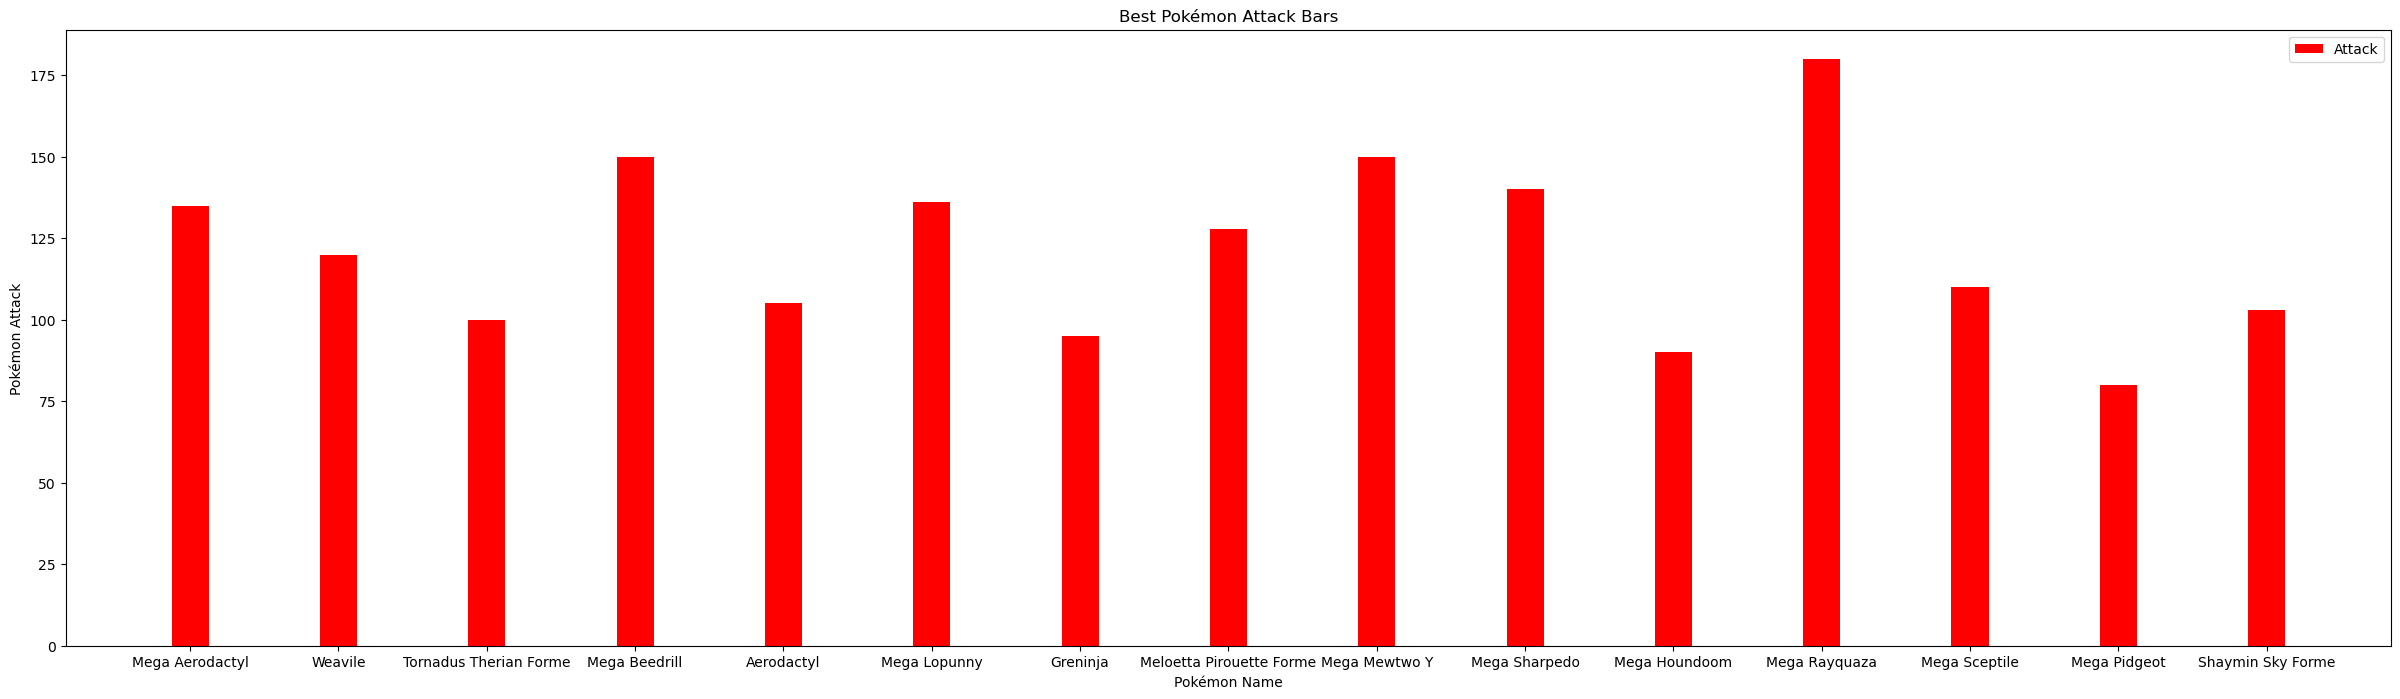

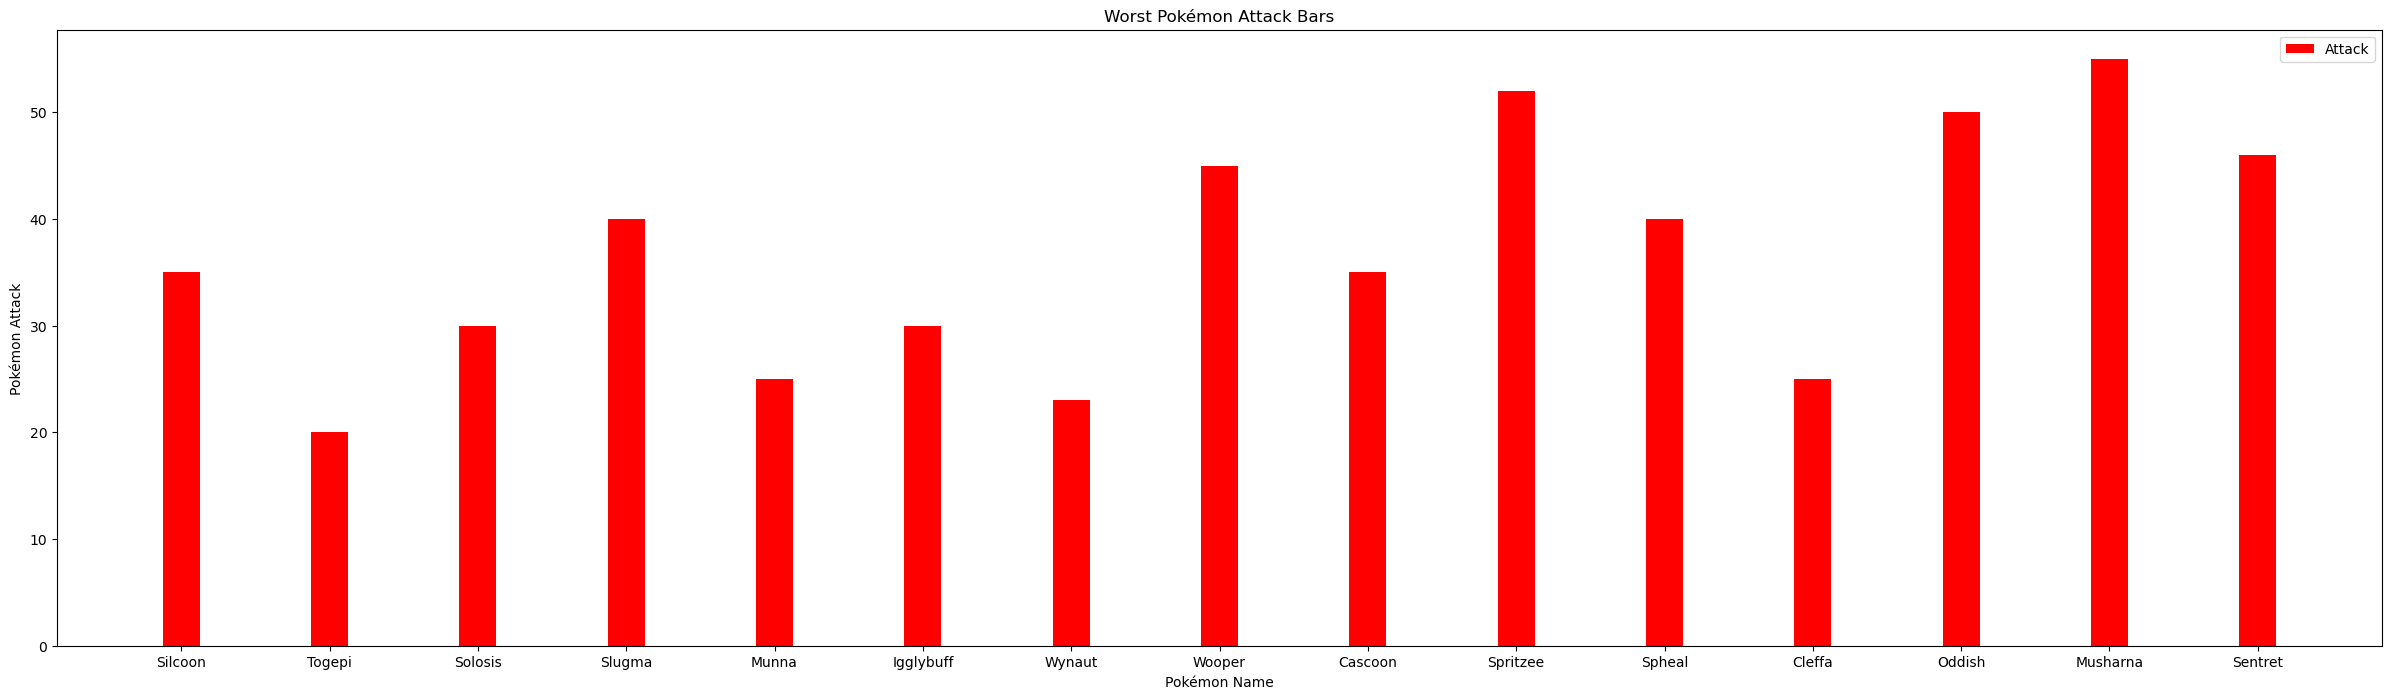

In [54]:
plt.figure(figsize = (30,8))

plt.bar(best_pokemon["Name"],best_pokemon.Attack,label="Attack",color="red",width = 0.25)
plt.xlabel("Pokémon Name")
plt.ylabel("Pokémon Attack")
plt.title("Best Pokémon Attack Bars")
plt.legend()
plt.show()

plt.figure(figsize = (30,8))

plt.bar(worst_pokemon["Name"],worst_pokemon.Attack,label="Attack",color="red",width = 0.25)
plt.xlabel("Pokémon Name")
plt.ylabel("Pokémon Attack")
plt.title("Worst Pokémon Attack Bars")
plt.legend()
plt.show()

From these graphs we can see that the "HP" and "Attack" stats for the worst Pokémon are significantly lower than the stats for the best Pokémon. From that, we can deduce that the higher the stats, the more likely the Pokémon is going to win.